In [1]:
 
%matplotlib inline
# importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# importamos scipy.stats que ayudará a generar distribuciones import scipy.stats as stats
# archivos con funciones de visualización
import lec3_graphs as gfx
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos

In [2]:
df = pd.read_csv('qog_std_cs_jan18.csv') 
df.shape

(194, 1882)

In [3]:
   
df['undp_hdi'].describe().round(3)

count    186.000
mean       0.696
std        0.155
min        0.347
25%        0.567
50%        0.726
75%        0.805
max        0.948
Name: undp_hdi, dtype: float64

hay 186 observaciones con valores registrados, que no concuerdan con las 194 observaciones originales.

Para obtener una lista de los países que no registran niveles de desarrollo humano, podemos hacer lo siguiente:

In [4]:
 # Generamos una nueva columna que devuelva un booleano si es que la observación no está presente
df['flagnull'] = df['undp_hdi'].isnull()
# dentro de cada fila de nuestra base
for i, r in df.iterrows():
# si flagnull es verdadero 
    if r['flagnull'] is True:
# imprime el nombre
        print(r['cname'])
    
# Obs: Hay una forma menos 'memory hungry' de hacer esto con el metodo 'loc' que veremos mas adelante:
df.loc[df['undp_hdi'].isnull()]['cname'].unique()

Taiwan
Korea, North
Monaco
Nauru
Marshall Islands
San Marino
Somalia
Tuvalu


array(['Taiwan', 'Korea, North', 'Monaco', 'Nauru', 'Marshall Islands',
       'San Marino', 'Somalia', 'Tuvalu'], dtype=object)

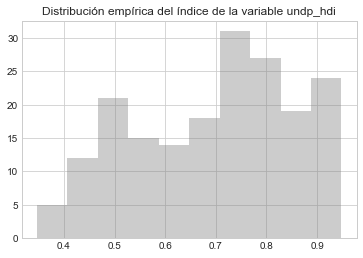

In [5]:
 
# vamos a eliminar los datos perdidos en la columna undp_hdi con dropna()
hdi_dropna = df['undp_hdi'].dropna();
plt.hist(hdi_dropna, color='grey', alpha=.4)
plt.title("Distribución empírica del índice de la variable undp_hdi");

In [6]:
hdi_group = df.loc[:, ['cname', 'ccode', 'undp_hdi', 'ht_region'] ] 
hdi_group.shape

(194, 4)

In [7]:
 hdi_group['region_recod'] = hdi_group['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['EastEurope', 'LatAm', 'NorthAfrica',
'SubSaharian', 'WesternDem', 'EastAsia', 'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])

In [8]:
print("La media del índice de desarrollo humano para nuestra muestra es de : ",round(hdi_group['undp_hdi'].mean(),2))

La media del índice de desarrollo humano para nuestra muestra es de :  0.7


In [9]:
group_mean = round(hdi_group.groupby('region_recod')['undp_hdi'].mean(),2) 
group_mean

region_recod
Caribbean        0.74
EastAsia         0.82
EastEurope       0.78
LatAm            0.72
NorthAfrica      0.75
Pacific          0.64
SouthAsia        0.61
SouthEastAsia    0.70
SubSaharian      0.51
WesternDem       0.90
Name: undp_hdi, dtype: float64

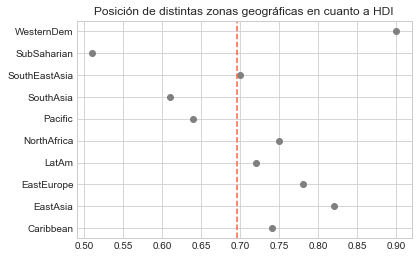

In [10]:
plt.title('Posición de distintas zonas geográficas en cuanto a HDI') 
plt.plot(group_mean.values, group_mean.index, 'o', color = 'grey') 
plt.axvline(hdi_group['undp_hdi'].mean(), color = 'tomato', linestyle = '--');

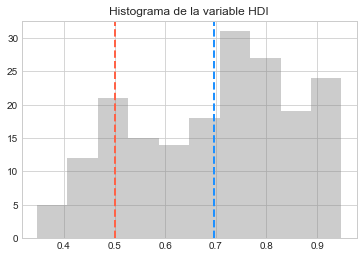

In [11]:
 
#guardemos la media en un objeto
hdi_mean = hdi_dropna.mean()
plt.hist(hdi_dropna, color='grey', alpha=.4) 
plt.axvline(hdi_mean, color='dodgerblue', linestyle='--', lw=2) 
plt.axvline(0.5, color='tomato', linestyle='--', lw=2) 
plt.title('Histograma de la variable HDI');

In [12]:
print("La media es: ", round(hdi_dropna.mean(), 3)) 
print("La varianza es: ", round(np.var(hdi_dropna), 3))

La media es:  0.696
La varianza es:  0.024


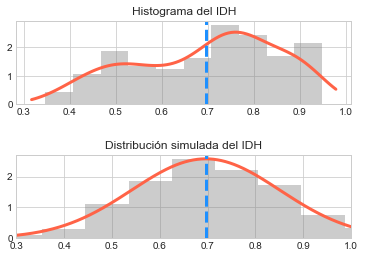

In [13]:

# Con plt.subplot vamos a dividir el espacio del en dos partes
plt.subplot(2,1,1)
# Graficamos el mismo histograma, especificando Normed para que el histograma represente densidades y no frecuencias
plt.hist(hdi_dropna, color='grey', alpha=.4, density=True)
# extraemos los límites del histograma
x_min, x_max = plt.xlim()
# utilizandos los límites del histograma para crear un array
x_axis = np.linspace(x_min, x_max, 100)
# graficamos la curva de densidad empirica (permite comparar directamente con la curva de densidad teorica)
gauss_kde = stats.gaussian_kde(hdi_dropna) # Kernel gaussiano
Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
plt.plot(x_axis, Z, color='tomato', lw=3)
# agregamos la línea vertical para identificar la media
plt.axvline(hdi_dropna.mean(), color='dodgerblue', linestyle='--', lw=3) 
plt.title("Histograma del IDH")
# El segundo gráfico
plt.subplot(2, 1, 2)
# Simulamos cómo debería comportarse un histograma normal.
plt.hist(np.random.normal(0.696, np.sqrt(0.024), 1000), color='grey', alpha=.4, density=True) # Fijamos los límites del eje x
plt.xlim(0.3, 1)
# Generamos una lista entre
x_axis = np.linspace(.3, 1, 1000) 
plt.plot(x_axis, stats.norm.pdf(x_axis,
0.696, np.sqrt(0.024)), color='tomato', lw=3)
plt.axvline(0.696, color='dodgerblue', linestyle='--', lw=3) 
plt.title("Distribución simulada del IDH") 
plt.subplots_adjust(hspace=0.6)
 

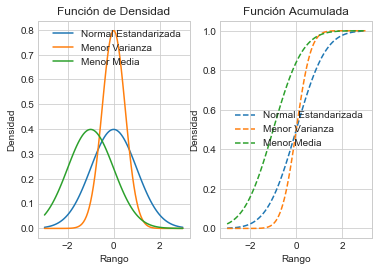

In [14]:
gfx.normal_distributions() 

In [15]:
# generemos la normalización del gdp mediante el logaritmo.
gdp_dropna = df['gle_cgdpc'].dropna() 
log_gdp = np.log(gdp_dropna) 
print(round(log_gdp.mean() ,2))

8.85


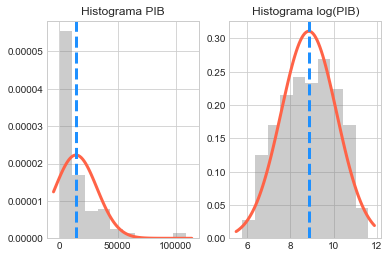

In [16]:
 
plt.subplot(1, 2, 1)
plt.hist(gdp_dropna, color='grey', alpha=.4, density=True) 
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis,
gdp_dropna.mean(),
gdp_dropna.std()), color='tomato', lw=3)
plt.axvline(gdp_dropna.mean(), color='dodgerblue',
linestyle='--', lw=3) 
plt.title("Histograma PIB")
plt.subplot(1, 2, 2)
plt.hist(log_gdp, color='grey', alpha=.4, density=True) 
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100) 
plt.plot(x_axis, stats.norm.pdf(x_axis,
log_gdp.mean(),
log_gdp.std()), color='tomato', lw=3)
plt.axvline(log_gdp.mean(), color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma log(PIB)");

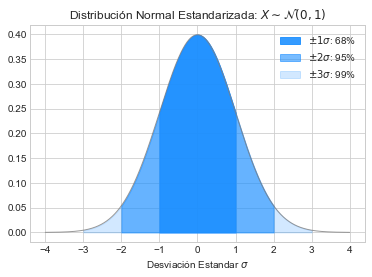

In [17]:
gfx.normal_distribution_sigma()

La información entregada por la distribución normal nos permite aproximar nuestro conocimiento respecto al comportamiento de la variable.

También podemos utilizar ésta información para analizar cómo una observación en específico se comporta respecto a la media. Para ello utilizamos los puntajes z.

La fórmula se detalla a continuación.

$ z=\frac{x_{i}-\bar{x}}{\sigma }$ 

El procedimiento para obtener el puntaje z de una observación implica:

1. Obtener la media del vector donde proviene la observación. 
2. Restar la observación con la media.
3. Dividir el resultado por la desviación estandar.

El resultado de la operación indica a cuántas desviaciones estándares se encuentra una observación respecto a la media.

In [18]:
chile = df[df['cname'] == 'Chile']

In [19]:
chile['undp_hdi']

35    0.845
Name: undp_hdi, dtype: float64

In [20]:
hdi_chile = df[df['cname']=='Chile']['undp_hdi']
print('hdi Chile: %.3f' %hdi_chile)
print('hdi medio a nivel mundial: %.3f' %round(hdi_dropna.mean(),3))

hdi Chile: 0.845
hdi medio a nivel mundial: 0.696


In [21]:
print('Puntaje Z para Chile: %.2f' %((hdi_chile - hdi_dropna.mean()) / np.sqrt(hdi_dropna.var())))

Puntaje Z para Chile: 0.96


In [22]:
 
def get_zscore(col, case):
    get_point = df[df['cname']==case][col] 
    preproc=df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(preproc.var())
    return (get_point - get_mean) / get_std

In [23]:
get_zscore('undp_hdi', 'Chile')

35    0.960783
Name: undp_hdi, dtype: float64

In [24]:
get_zscore('undp_hdi', 'Namibia')

118   -0.378656
Name: undp_hdi, dtype: float64

In [25]:
get_zscore('undp_hdi', 'Uruguay')

188    0.632363
Name: undp_hdi, dtype: float64

In [26]:
get_zscore('undp_hdi', 'China')

36    0.245986
Name: undp_hdi, dtype: float64

In [27]:
 
# definamos la función
def point_zscore(col, case):
    get_point = df[df['cname']==case][col]
    preproc=df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(hdi_dropna.var())
    get_zscore = float((get_point - get_mean) / get_std) 
    plt.axvline(get_zscore, ymin = 0, ymax = .1, color='tomato', lw=2) 
    plt.annotate(case, xy=(get_zscore + .05, 0.06),color='tomato', rotation=60, ha='center', size = 7)

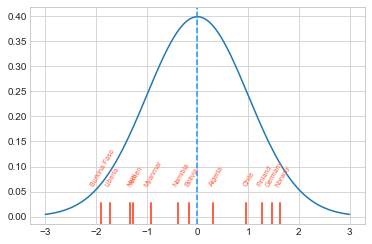

In [33]:
# generamos un array lineal
x_axis = np.linspace(-3, 3, 200)
# simulamos la función de densidad 
plt.plot(x_axis, stats.norm.pdf(x_axis, 0, 1))
# marcamos la media en 0
plt.axvline(0, color='dodgerblue', linestyle='--')
#plt.hist(hdi_dropna, color='grey', alpha=.4)
for i in ['Chile', 'Burkina Faso', 'Haiti', 'Myanmar',
'Germany', 'Norway', 'Finland', 'Yemen', 'Bolivia', 'Algeria', 'Namibia', 'Liberia']:
# aplicaremos la función point_zscore
    point_zscore('undp_hdi', i)



_________________________________________________

Variables discretas

In [34]:

 
# Proporciones de cada tipo de gobierno en el dataset
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No Democracia') # pidamos los porcentajes de democracias
democount = df['democracies'].value_counts('%').round(2)
democount

Democracia       0.65
No Democracia    0.35
Name: democracies, dtype: float64

In [35]:
df['democracies'].value_counts()

Democracia       127
No Democracia     67
Name: democracies, dtype: int64

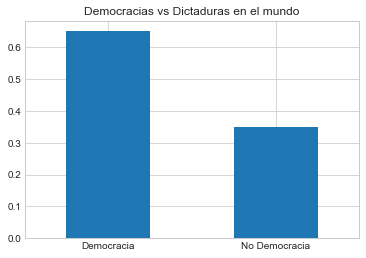

In [38]:
democount.plot(kind = 'bar')
plt.title("Democracias vs Dictaduras en el mundo") 
plt.xticks(rotation = 'horizontal');

In [39]:
 
mu, sigma = stats.bernoulli.stats(.65)
print("La media del ensayo de Bernoulli es de: ", mu.round(2))
print("La varianza del ensayo de Bernoulli es de: ", sigma.round(2))
print("La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre :",
round(mu - sigma, 2), round(mu + sigma, 2))


La media del ensayo de Bernoulli es de:  0.65
La varianza del ensayo de Bernoulli es de:  0.23
La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre : 0.42 0.88


In [40]:
 
prob_dem = stats.binom(len(df), .654)
mu, sigma = prob_dem.stats()
print("Con", len(df), "países y una probabilidad de .654, esperamos que", mu, " países tengan regímenes democráticos." )

Con 194 países y una probabilidad de .654, esperamos que 126.876  países tengan regímenes democráticos.


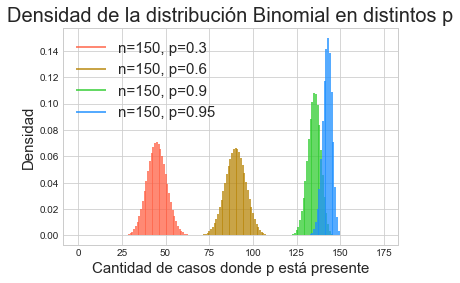

In [48]:
# generamos una lista con cuatro colores
colors = ["tomato", "darkgoldenrod", "limegreen", "dodgerblue"]
# iniciamos un loop para índices y valores
for i, prob in enumerate([.3, .6,.9, .95]):
    x_axis= np.arange(175)
    # para cada valor de nuestro array graficamos la probabilidad 
    plt.vlines(x_axis, 0, stats.binom(150, prob).pmf(x_axis),colors=colors[i], label="n=150, p={}".format(prob)) 
plt.legend(loc=2, fontsize = 15)
plt.title("Densidad de la distribución Binomial en distintos p", size = 20) 
plt.xlabel('Cantidad de casos donde p está presente', size = 15) 
plt.ylabel('Densidad', size = 15);
 